In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('dirty_retail_sales.csv')

# Get a first look at the data and its issues
print("--- Initial Data Info ---")
df.info()
print("\n--- First 5 Rows ---")
print(df.head())

--- Initial Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB

--- First 5 Rows ---
  Transaction ID Customer ID       Category          Item  Price Per Unit  \
0    TXN_6867343     CUST_09     Patisserie   Item_10_PAT            18.5   
1    TXN_3731986     CUST_

In [2]:
# Strip leading/trailing whitespace and convert to lowercase
df.columns = df.columns.str.strip().str.lower()

# Optional: Rename columns for clarity if needed
# df.rename(columns={'customer id': 'customer_id'}, inplace=True)

print("--- Standardized Column Names ---")
print(df.columns)

--- Standardized Column Names ---
Index(['transaction id', 'customer id', 'category', 'item', 'price per unit',
       'quantity', 'total spent', 'payment method', 'location',
       'transaction date', 'discount applied'],
      dtype='object')


In [3]:
# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# 'customer_id' might be a float if it has missing values; let's convert it to a more appropriate string type later
# after handling missing values.

print("--- Data Types After Conversion ---")
df.info()

KeyError: 'date'

In [4]:
print(df.columns)

Index(['transaction id', 'customer id', 'category', 'item', 'price per unit',
       'quantity', 'total spent', 'payment method', 'location',
       'transaction date', 'discount applied'],
      dtype='object')


In [5]:
# Standardize all column names
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Print the new column names to confirm
print(df.columns)

Index(['transaction_id', 'customer_id', 'category', 'item', 'price_per_unit',
       'quantity', 'total_spent', 'payment_method', 'location',
       'transaction_date', 'discount_applied'],
      dtype='object')


In [6]:
# Convert the correctly named column to datetime objects
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')

# Check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    12575 non-null  object        
 1   customer_id       12575 non-null  object        
 2   category          12575 non-null  object        
 3   item              11362 non-null  object        
 4   price_per_unit    11966 non-null  float64       
 5   quantity          11971 non-null  float64       
 6   total_spent       11971 non-null  float64       
 7   payment_method    12575 non-null  object        
 8   location          12575 non-null  object        
 9   transaction_date  12575 non-null  datetime64[ns]
 10  discount_applied  8376 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 1.1+ MB


In [7]:
# For 'customer_id', we can't invent an ID. Depending on the analysis,
# we might fill it with a placeholder or drop the rows. Let's drop them for this project.
df.dropna(subset=['customer_id'], inplace=True)

# Now that nulls are gone, convert 'customer_id' to an integer, then to a string for consistency
df['customer_id'] = df['customer_id'].astype(int).astype(str)

# Drop any other rows that have missing date information from the previous step
df.dropna(subset=['date'], inplace=True)

print("--- Missing Values After Handling ---")
print(df.isnull().sum())

ValueError: invalid literal for int() with base 10: 'CUST_09'

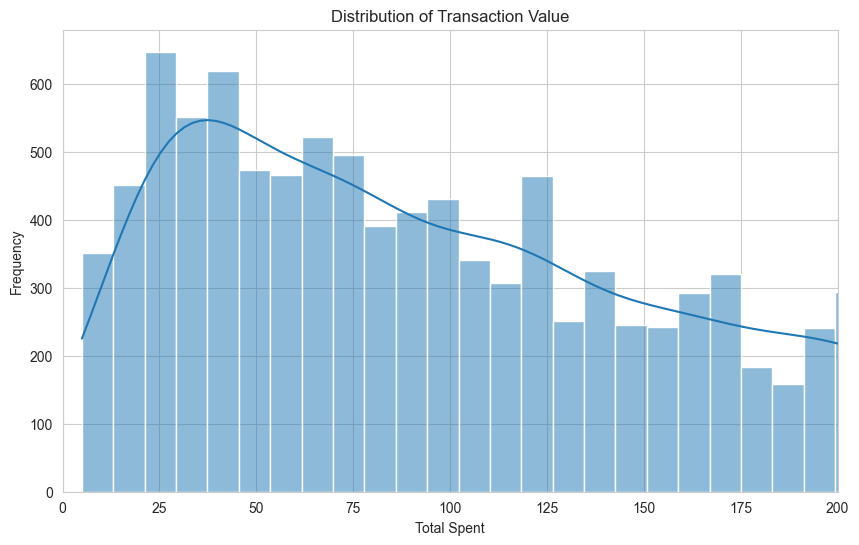

/var/folders/tc/r_9v6dkj5pj7c0ymq4f7hsyr0000gn/T/ipykernel_39917/2045852603.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


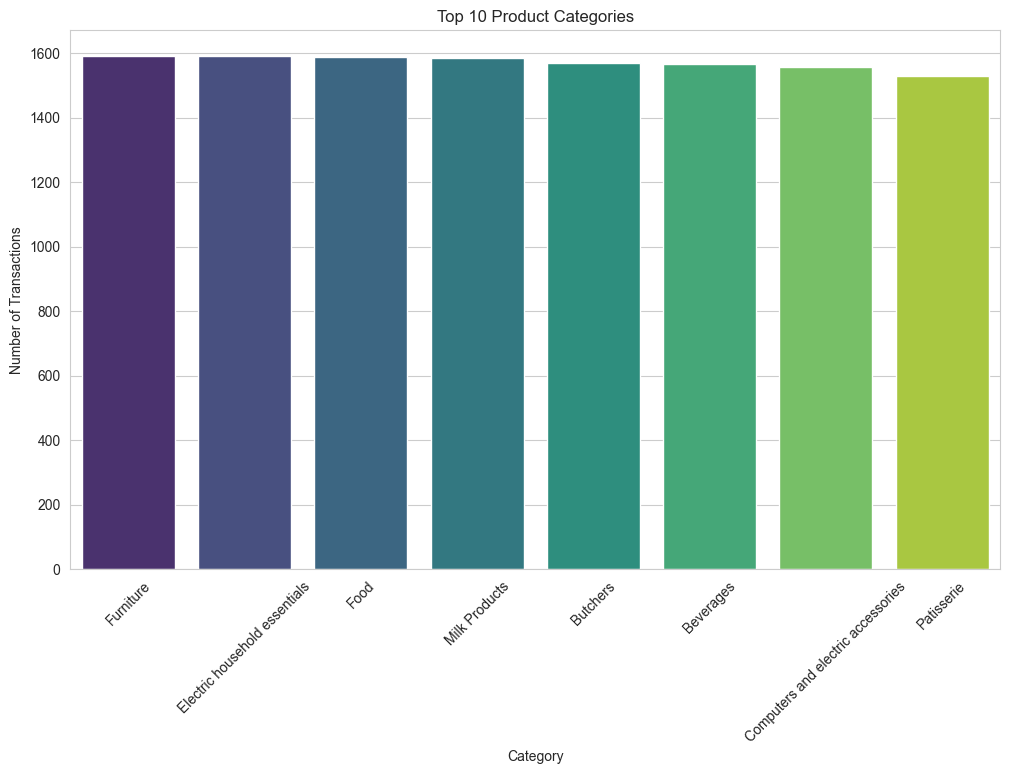

/var/folders/tc/r_9v6dkj5pj7c0ymq4f7hsyr0000gn/T/ipykernel_39917/2045852603.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('transaction_date')['total_spent'].resample('M').sum()


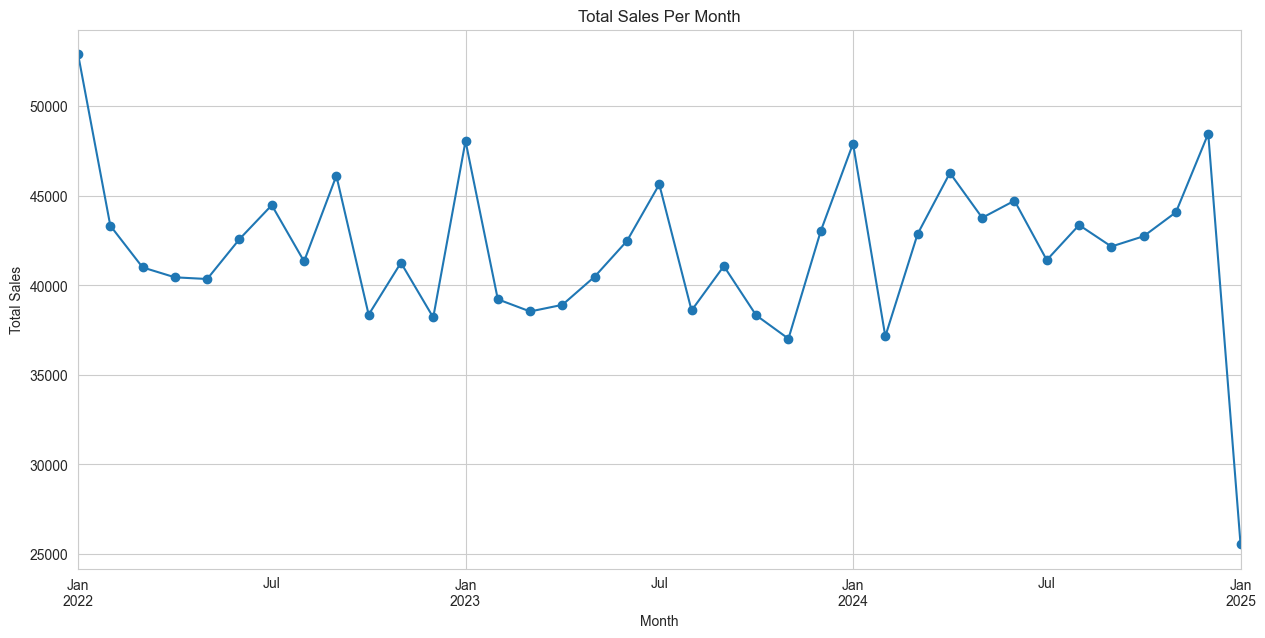

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the visual style for the plots
sns.set_style('whitegrid')

# 1. Distribution of Total Spent per Transaction
plt.figure(figsize=(10, 6))
sns.histplot(df['total_spent'], bins=50, kde=True)
plt.title('Distribution of Transaction Value')
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.xlim(0, 200) # Limit x-axis to see the main distribution more clearly
plt.show()

# 2. Top 10 Most Popular Product Categories
plt.figure(figsize=(12, 7))
top_categories = df['category'].value_counts().head(10)
sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
plt.title('Top 10 Product Categories')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# 3. Sales Trends Over Time
# Resample data by month to see monthly sales trends
monthly_sales = df.set_index('transaction_date')['total_spent'].resample('M').sum()
plt.figure(figsize=(15, 7))
monthly_sales.plot(kind='line', marker='o')
plt.title('Total Sales Per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

/var/folders/tc/r_9v6dkj5pj7c0ymq4f7hsyr0000gn/T/ipykernel_39917/1494428153.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y=top_customers.values, palette='plasma', order=top_customers.index)


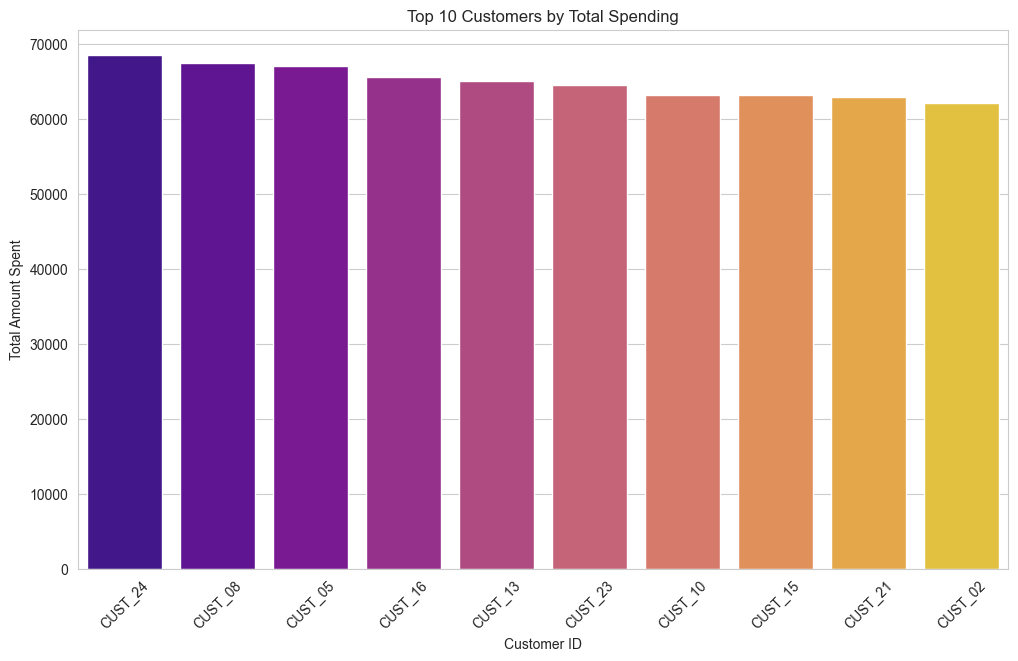

Top 10 Customers:
 customer_id
CUST_24    68452.0
CUST_08    67351.5
CUST_05    66974.5
CUST_16    65570.5
CUST_13    65037.0
CUST_23    64507.0
CUST_10    63155.5
CUST_15    63117.5
CUST_21    62933.0
CUST_02    62046.5
Name: total_spent, dtype: float64


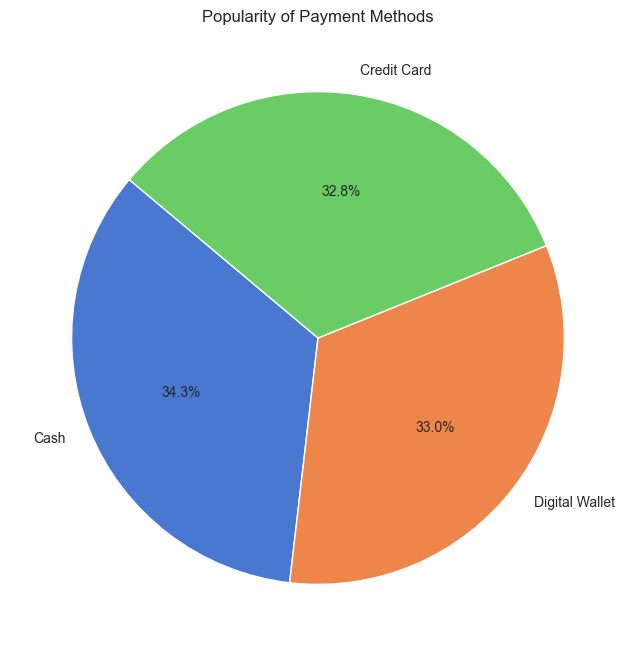

/var/folders/tc/r_9v6dkj5pj7c0ymq4f7hsyr0000gn/T/ipykernel_39917/1494428153.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_spent_by_location.index, y=avg_spent_by_location.values, palette='cubehelix')


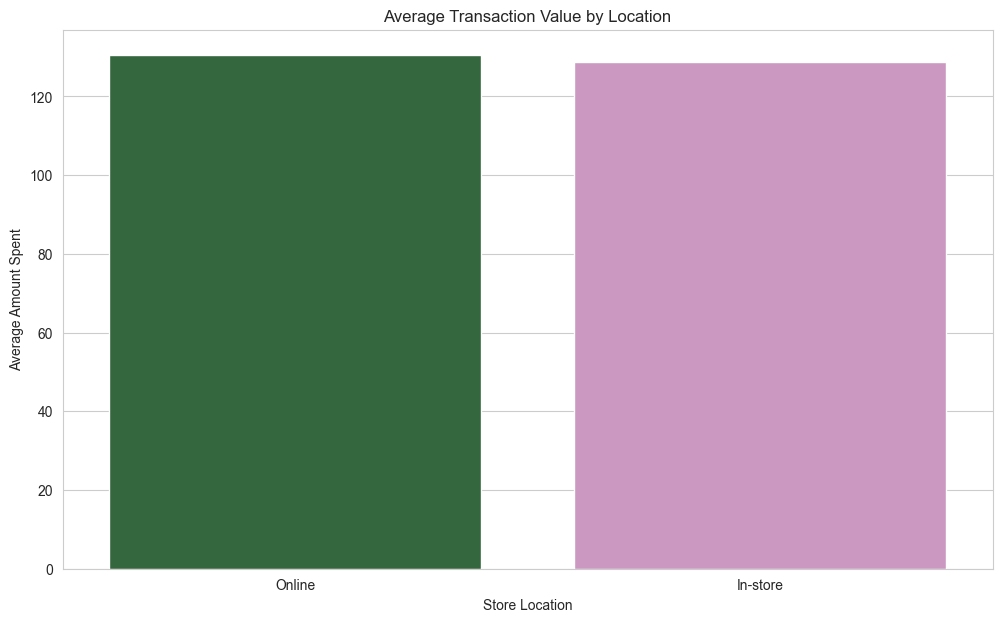

In [9]:
# Question 1: Who are the top 10 customers by total spending?
top_customers = df.groupby('customer_id')['total_spent'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=top_customers.index, y=top_customers.values, palette='plasma', order=top_customers.index)
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.show()
print("Top 10 Customers:\n", top_customers)


# Question 2: Which payment method is the most popular?
payment_methods = df['payment_method'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(payment_methods, labels=payment_methods.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted'))
plt.title('Popularity of Payment Methods')
plt.ylabel('') # Hides the 'payment_method' label on the y-axis
plt.show()


# Question 3: What is the average transaction value by store location?
avg_spent_by_location = df.groupby('location')['total_spent'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 7))
sns.barplot(x=avg_spent_by_location.index, y=avg_spent_by_location.values, palette='cubehelix')
plt.title('Average Transaction Value by Location')
plt.xlabel('Store Location')
plt.ylabel('Average Amount Spent')
plt.show()